# Causal Modelling

## Importing working Libraries and Scripts

In [13]:
import warnings
# silence warnings
warnings.filterwarnings("ignore")

from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import pandas as pd

import sys
from typing import Tuple


In [6]:
# Creating a Structural Model
sm = StructureModel()

In [8]:
set(data_1.dtypes.to_list())

{dtype('int64'), dtype('float64')}

# Initial Full Train Data Causality Graph

## Data With Outlier Revalued

In [17]:
# Outlier Revalued, MinMaxed And Normalized Data
data_1 = pd.read_csv('../data/out_revalued_minmax_scale_norm.csv')


In [19]:
# Constructing Causality Graph from Dataframe
sm_data_1 = from_pandas(data_1.iloc[:,1:])

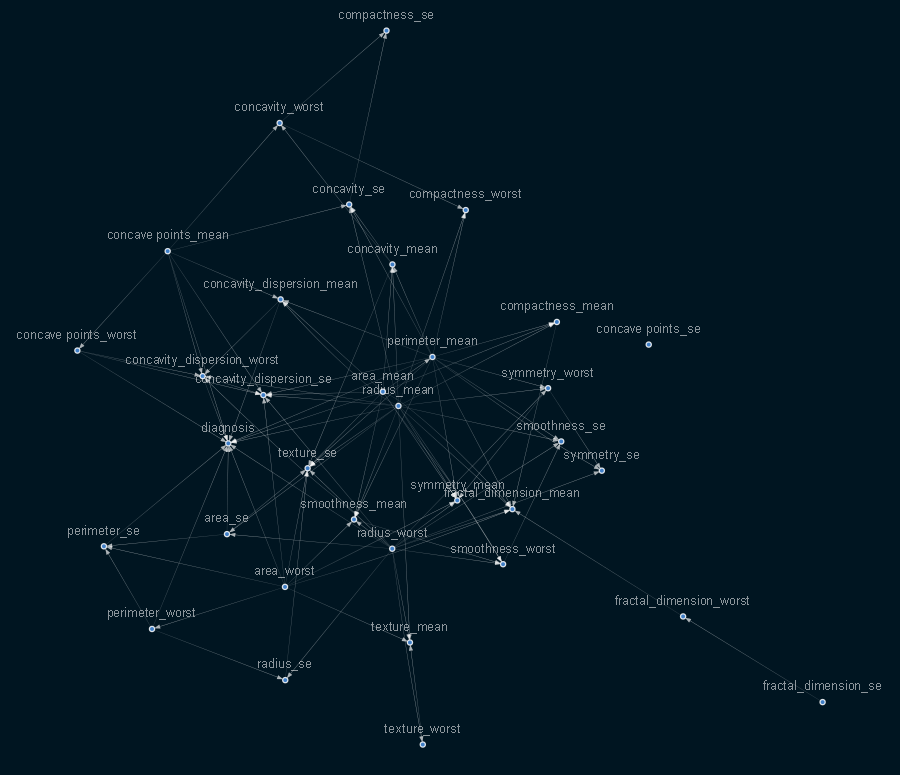

In [24]:
# Visualizing resulting graph only considering edges 0.8 and above threshold
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.8", "size":3},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


## Data without Outlier Values (Removed)

In [25]:
# Outlier Removed, MinMaxed And Normalized Data
data_2 = pd.read_csv('../data/out_removed_minmax_scale_norm.csv')


In [26]:
# Constructing Causality Graph from Dataframe
sm_data_2 = from_pandas(data_2.iloc[:, 1:])

In [48]:
graph_attributes = {
    "rankdir": "LR",  # Change ranking direction to be horizontal
    "splines": "true",  # Do not curve edges, use straight lines instead
    "bgcolor": "orange",  # background color
    "label": "An ugly plot\nto exemplify how many customisations are possible",
    "fontcolor": "red",  # Setting label font
    "fontname": "Times",  # Setting label font settings
    "fontsize": 20,  # Setting LABEL font settings
    "pad": "0.8,0.3",  # setting a margin
    "dpi": 120,  # resolution
    "labeljust": "l",  # This sets the title to be at the left
    "labelloc": "t",  # This sets the title to be at the top
    "nodesep": 0.2,  # separation between nodes with same rank
    "ranksep": 1.1,  # This changes the distances between rank levels in hierarchy (For Dot and twopi only )
}

# Changing attributes of specific nodes
node_attributes = {
    "diagnosis": {  # We change the attributes of the node "Age"
        "shape": "square",
        "style": "dashed",
        "width": 1,
        "penwidth": "4",  # Thickness of the boundary
        "color": "#4a90e2d9",
        "orientation": 25,  # rotate node
    },
    "radius_mean": {
        "shape": "hexagon",
        "regular": "true",  # forces the polygon to be regular
        "color": "green",
    },
    "radius_se": {
        "shape": "star",
        "label": "This is a star",  # Label overwrites the default nae
    },
    "radius_worst": {
        "image": "./supporting_files/cat.jpeg",  # we can upload local images inside a node
        "width": 1.2,
        "shape": "dot",  # choose node to be a dot, so that the image is larger than the node
    },
}

# Changing attributes of specific edges
edge_attributes = {
    ("radius_mean", "symmetry_worst"): {
        "label": "this is an edge label",  # Edges can have labels
        "fontcolor": "chocolate",  # setting the label color
    },
    ("SocioEcon", "GoodStudent"): {"color": "blue"},
    ("SocioEcon", "RiskAversion"): {
        "constraint": "false"
    },  # edge not used for ranking, both extremities are on same level
    ("SocioEcon", "VehicleYear"): {"penwidth": 15},  # Thickness of edge
}


In [97]:
graph_attributes = {
    "splines": "spline",  # I use splies so that we have no overlap
    "ordering": "out",
    "ratio": "fill",  # This is necessary to control the size of the image
    "size": "16,9!",  # Set the size of the final image. (this is a typical presentation size)
    "label": "The structure of our\n \t Insurance model",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 100,
    "labeljust": "l",
    "labelloc": "t",
    "pad": "1,1",
    "dpi": 200,
    "nodesep": 0.8,
    "ranksep": "1.1 equally",
}

# Making all nodes hexagonal with black coloring
node_attributes = {
    node: {
        "shape": "hexagon",
        "width": 10,
        "height": 10,
        "fillcolor": "#000000",
        "penwidth": "40",
        "color": "#4a90e2d9",
        "fontsize": 80,
        "labelloc": "c",
    }
    for node in sm_data_2.nodes
}

# Splitting two words with "\n"
# for node in sm_data_2.nodes:
#     up_idx = [i for i, c in enumerate(node) if c.isupper()][-1]
#     node_attributes[node]["label"] = node[:up_idx] + "\n" + node[up_idx:]

# Target nodes (ones with "Cost" in the name) are colored differently
for node in sm_data_2.nodes:
    if "diagnosis" in node:  # We color nodes with "cost" in the name with a orange colour.
        node_attributes[node]["fillcolor"] = "#DF5F00"

# Customising edges
edge_attributes = {
    (u, v): {
        "penwidth": w * 20 + 2,  # Setting edge thickness
        "weight": int(5 * w),  # Higher "weight"s mean shorter edges
        "arrowsize": 2 - 2.0 * w,  # Avoid too large arrows
        "arrowtail": "dot",
    }
    for u, v, w in sm_data_2.edges(data="weight")
}


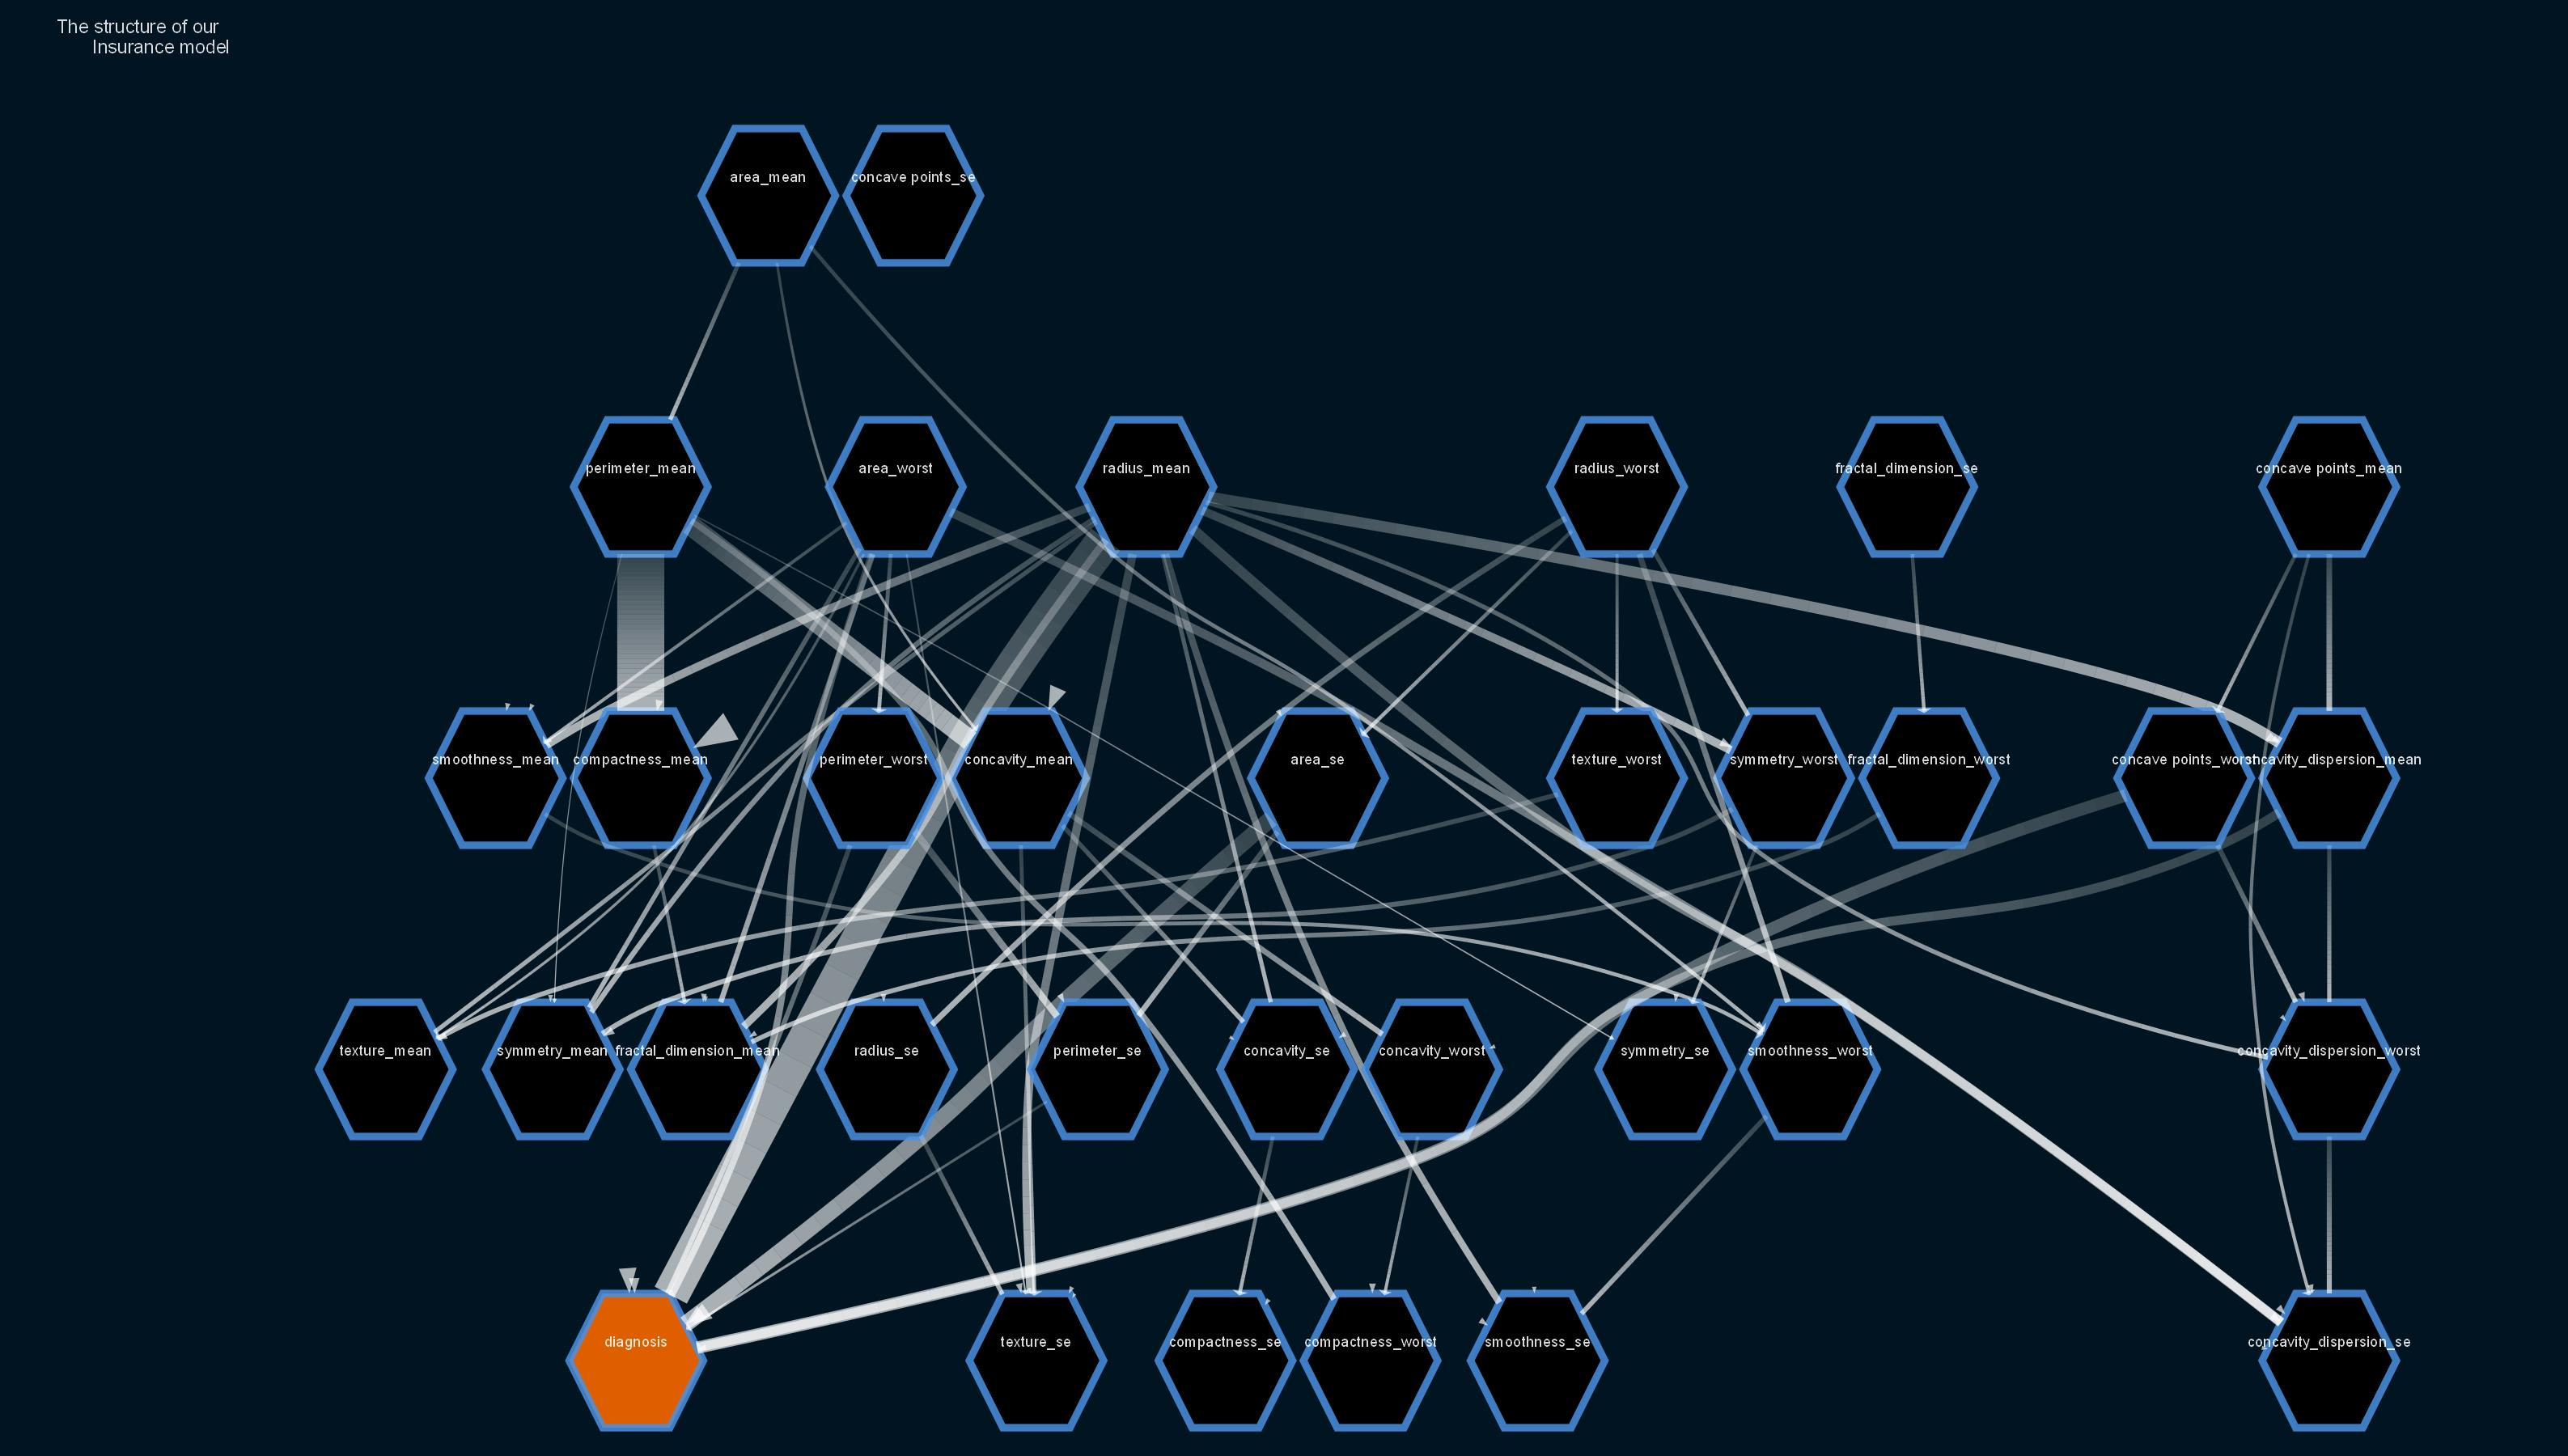

In [100]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    prog='dot',
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    )
Image(viz.draw(format='jpg'), height=700)


## Comparing Causal Graphs with Varying Data Size

In [101]:
len(data_2)

409

In [103]:
type(sm_data_2)


causalnex.structure.structuremodel.StructureModel

In [102]:
# Classify dataset within 100 Range
data_range_1 = data_2[:100]
data_range_2 = data_2[:200]
data_range_3 = data_2[:300]

In [110]:
def calculate_jaccard_similarity(SCM_1: StructureModel, SCM_2: StructureModel) -> float:
    # Calculate Edges of SCM Graphs
    SCM_1_edges = SCM_1.edges()
    SCM_2_edges = SCM_2.edges()

    # Calculate Edge Intersections and total edges
    intersection_edges = set(SCM_1_edges).intersection(SCM_2_edges)
    total_edges = len(SCM_1_edges) + \
        len(SCM_2_edges) - len(intersection_edges)

    # Calculate jacard similarity value
    value = len(intersection_edges) / total_edges

    return round(value, 2)


In [113]:
# Constructing Causality Graph on First Cluster Dataset
sm_range_1 = from_pandas(data_range_1.iloc[:, 1:])


In [ ]:
calculate_jaccard_similarity(sm_data_2, sm_range_1)

In [ ]:
# Constructing Causality Graph on First Cluster Dataset
sm_range_2 = from_pandas(data_range_2.iloc[:, 1:])


In [ ]:
calculate_jaccard_similarity(sm_data_2, sm_range_2)


In [ ]:
# Constructing Causality Graph on First Cluster Dataset
sm_range_3 = from_pandas(data_range_3.iloc[:, 1:])


In [ ]:
calculate_jaccard_similarity(sm_data_2, sm_range_3)
